In [25]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import seaborn as sns
from scipy import stats

In [26]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [93]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f5e8477ec8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

## D1: Determine the Summary Statistics for June

In [29]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== 6).all()

print(results)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [30]:
# 2. Convert the June temperatures to a list.
june_temps = list(np.ravel(results))

june_temps

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [31]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ['June Temps (F)'])

june_temps_df.head()

,June Temps (F)
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [32]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps (F)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

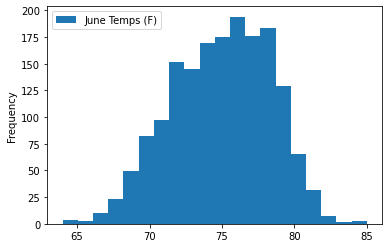

In [74]:
june_temps_df.plot.hist(bins=20)


In [33]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [34]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = []
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== 12).all()

print(results)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [35]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))
dec_temps

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [36]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns = ['December Temps (F)'])
dec_temps_df.head()

,December Temps (F)
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [37]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps (F)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

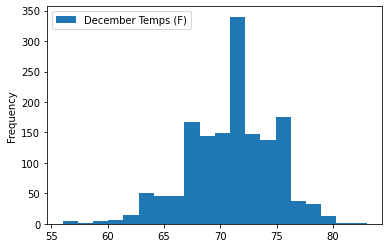

In [75]:
dec_temps_df.plot.hist(bins=20)

In [80]:
rng = np.random.default_rng()
x = rng.random(10)
y = 1.6*x + rng.random(10)
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")


R-squared: 0.841774


In [38]:
# 10. Return to your challenge instructions to compare your summary statistics

In [39]:
# additional query #1
results = []
results = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date)== 6).all()

print(results)

[(78.0, 0.0), (76.0, 0.01), (78.0, 0.0), (76.0, 0.0), (77.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (79.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (82.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (76.0, 0.02), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.07), (78.0, 0.0), (73.0, 0.56), (70.0, 0.89), (76.0, 0.0), (77.0, 0.0), (77.0, 0.0), (77.0, 0.03), (77.0, 0.01), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (75.0, 0.05), (76.0, 0.06), (76.0, 0.07), (77.0, None), (78.0, 0.0), (76.0, 0.0), (77.0, 0.01), (75.0, 0.01), (77.0, 0.0), (76.0, 0.02), (76.0, 0.02), (75.0, 0.0), (77.0, 0.0), (77.0, 0.0), (76.0, 0.0), (78.0, 0.0), (77.0, None), (76.0, None), (77.0, 0.0), (76.0, 0.0), (76.0, 0.0), (77.0, 0.0), (77.0, 0.0), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (77.0, 0.0), (76.0, 0.0), (75.0, 

In [40]:
# Created a temp and prcp dataframe for June
june_prcp_df = pd.DataFrame(results, columns = ['temp', 'precipitation'])

june_prcp_df

,temp,precipitation
0,78.0,0.00
1,76.0,0.01
2,78.0,0.00
3,76.0,0.00
4,77.0,0.00
...,...,...
1695,79.0,0.02
1696,74.0,0.10
1697,74.0,0.02
1698,76.0,0.04


In [41]:
june_prcp_df.describe()

,temp,precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


Text(0.5, 1.0, 'June (Temp) vs (Precipitation)')

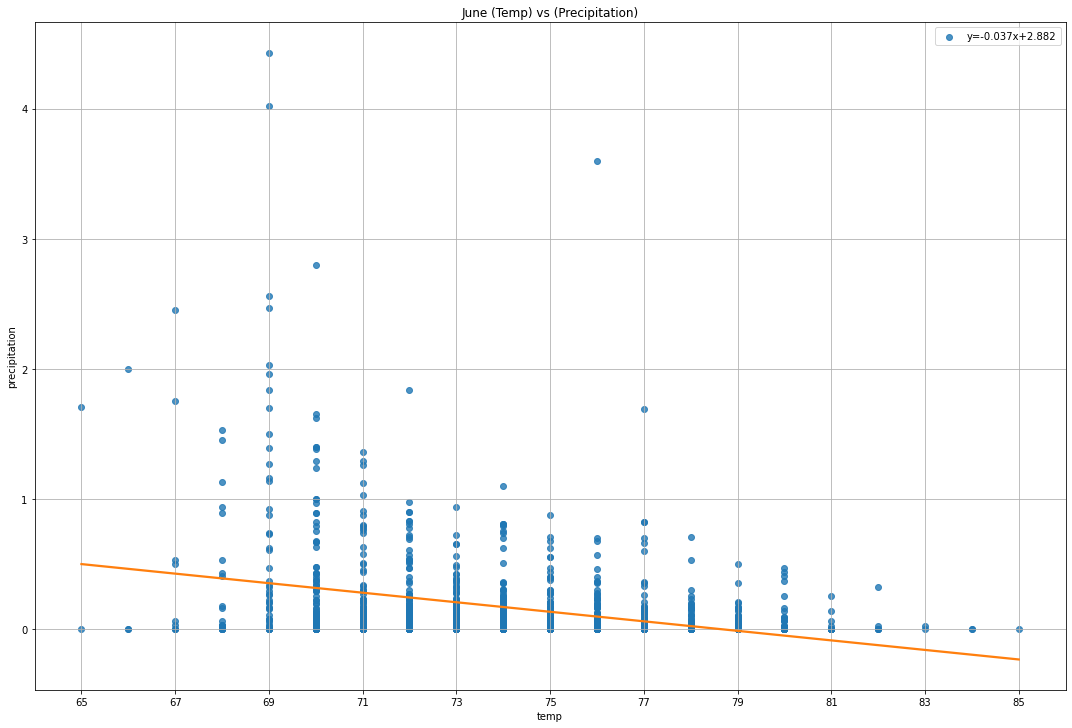

In [91]:
fig = plt.figure(figsize = (15, 10))
june_prcp_df = june_prcp_df.dropna()
#june_prcp_df.plot.scatter('precipitation', 'temp')
slope, intercept, r_value, p_value, stderr = stats.linregress(june_prcp_df['temp'],june_prcp_df['precipitation'])

sns.regplot(x='temp', y='precipitation', order = 1, ci=None, data=june_prcp_df, line_kws={"color": "C1"}, label="y={0:.3f}x+{1:.3f}".format(slope,intercept)).legend(loc="best")

plt.tight_layout()
plt.grid()
plt.xticks(np.arange(min(june_prcp_df['temp']), max(june_prcp_df['temp'])+1, 2))
plt.title('June (Temp) vs (Precipitation)')




In [43]:
# additional query #2
results = []
results = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date)== 12).all()

print(results)

[(76.0, 0.04), (74.0, 0.0), (74.0, 0.0), (64.0, 0.0), (64.0, 0.0), (67.0, 0.0), (77.0, 0.0), (66.0, 1.58), (69.0, 0.77), (68.0, 0.0), (68.0, 0.0), (71.0, 0.0), (74.0, 0.0), (67.0, 0.0), (66.0, 0.0), (69.0, 0.0), (71.0, 1.4), (70.0, 0.0), (70.0, 0.0), (74.0, None), (74.0, 0.13), (71.0, 0.55), (75.0, 0.06), (75.0, 0.01), (72.0, 0.0), (69.0, 0.03), (68.0, 0.08), (73.0, 0.0), (74.0, 0.0), (73.0, 0.0), (73.0, 0.0), (73.0, 0.0), (73.0, 0.0), (71.0, 0.13), (73.0, 0.07), (73.0, 0.07), (77.0, 0.08), (72.0, 0.4), (71.0, 0.7), (73.0, 0.0), (70.0, 0.01), (73.0, 0.07), (69.0, 0.02), (74.0, 0.15), (72.0, 0.02), (71.0, 0.18), (72.0, 0.03), (72.0, 0.04), (70.0, 0.1), (73.0, 0.03), (73.0, 0.0), (72.0, 0.0), (73.0, 0.0), (73.0, 0.0), (72.0, 0.0), (63.0, 0.01), (65.0, 0.0), (71.0, 0.0), (76.0, 0.0), (70.0, 0.2), (76.0, 0.01), (69.0, None), (69.0, None), (69.0, 0.0), (74.0, 0.0), (76.0, 0.0), (74.0, 0.0), (73.0, 0.0), (73.0, 0.14), (74.0, 0.09), (73.0, 0.01), (73.0, 0.02), (73.0, 0.02), (74.0, 0.12), (74.

In [44]:
# Created a temp and prcp dataframe for December
dec_prcp_df = pd.DataFrame(results, columns = ['temp', 'precipitation'] )
dec_prcp_df

,temp,precipitation
0,76.0,0.04
1,74.0,0.00
2,74.0,0.00
3,64.0,0.00
4,64.0,0.00
...,...,...
1512,71.0,0.14
1513,71.0,0.14
1514,69.0,1.03
1515,65.0,2.37


In [45]:
dec_prcp_df.describe()

,temp,precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


Text(0.5, 1.0, 'December (Temp) vs (Precipitation)')

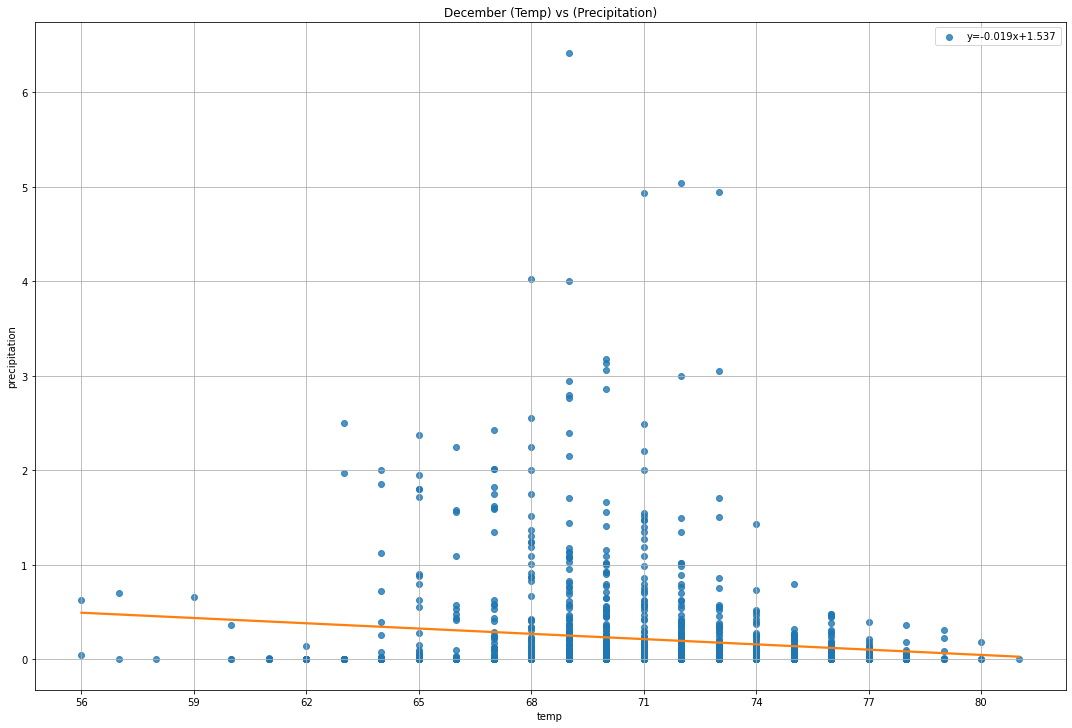

In [90]:
fig = plt.figure(figsize = (15, 10))
dec_prcp_df = dec_prcp_df.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(dec_prcp_df['temp'],dec_prcp_df['precipitation'])

sns.regplot(x='temp', y='precipitation', ci=None, data=dec_prcp_df, line_kws={"color": "C1"}, label="y={0:.3f}x+{1:.3f}".format(slope,intercept)).legend(loc="best")

plt.tight_layout()
plt.grid()
plt.xticks(np.arange(min(dec_prcp_df['temp']), max(dec_prcp_df['temp'])+1, 3))
plt.tight_layout()
plt.title('December (Temp) vs (Precipitation)')
